# Text analysis on Metallica and Iron Maiden lyrics

## Setup

In [81]:
#!pip install --user -U nltk
#nltk.download('treebank')
#nltk.download()

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import *
from nltk.draw.dispersion import dispersion_plot
from nltk.corpus import treebank
from nltk.probability import FreqDist
from nltk import tokenize, word_tokenize
import texthero as hero 
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy
from spacy import displacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [3]:
ironmaiden = open('ironmaiden_lyrics.txt', 'rU').read()
metallica = open('metallica_lyrics.txt', 'rU').read()

In [4]:
print("Characters in 86 Iron Maiden songs:", len(ironmaiden))
print("Characters in 86 Metallica songs:", len(metallica))

Characters in 86 Iron Maiden songs: 337144
Characters in 86 Metallica songs: 363013


## Preprocess text

In [9]:
ironmaiden_series = pd.Series(ironmaiden)
ironmaiden_clean = hero.clean(ironmaiden_series)

In [15]:
# split into words
metallica_tokens = word_tokenize(metallica)
ironmaiden_tokens = word_tokenize(ironmaiden)

# convert to lower case
metallica_tokens = [w.lower() for w in metallica_tokens]
ironmaiden_tokens = [w.lower() for w in ironmaiden_tokens]

# remove punctuation from each word
table = str.maketrans('', '', string.punctuation)
metallica_stripped = [w.translate(table) for w in metallica_tokens]
ironmaiden_stripped = [w.translate(table) for w in ironmaiden_tokens]

# remove remaining tokens that are not alphabetic
metallica_words = [word for word in metallica_stripped if word.isalpha()]
ironmaiden_words = [word for word in ironmaiden_stripped if word.isalpha()]

# filter out stop words
stop_words = set(stopwords.words('english'))
metallica_words = [w for w in metallica_words if not w in stop_words]
ironmaiden_words = [w for w in ironmaiden_words if not w in stop_words]


print(metallica_words[:100])
print(ironmaiden_words[:100])

['life', 'seems', 'fade', 'away', 'drifting', 'everyday', 'getting', 'lost', 'within', 'nothing', 'matters', 'one', 'else', 'lost', 'live', 'simply', 'nothing', 'give', 'nothing', 'need', 'end', 'set', 'free', 'things', 'used', 'missing', 'one', 'inside', 'deathly', 'loss', 'ca', 'nt', 'real', 'stand', 'hell', 'feel', 'emptiness', 'filling', 'point', 'agony', 'growing', 'darkness', 'taking', 'dawn', 'gone', 'one', 'save', 'late', 'ca', 'nt', 'think', 'think', 'even', 'try', 'yesterday', 'seems', 'though', 'never', 'existed', 'death', 'greets', 'warm', 'say', 'goodbye', 'goodbye', 'guilty', 'charged', 'damn', 'ai', 'nt', 'right', 'someone', 'else', 'controlling', 'death', 'air', 'strapped', 'electric', 'chair', 'ca', 'nt', 'happening', 'made', 'god', 'say', 'take', 'life', 'flash', 'eyes', 'time', 'die', 'burning', 'brain', 'feel', 'flames', 'wait', 'sign', 'flick', 'switch', 'death']
['stranger', 'comet', 'streaks', 'across', 'sky', 'stranger', 'truth', 'know', 'open', 'eyes', 'dealt',

In [59]:
ironmaiden = ironmaiden.lower()
metallica = metallica.lower()

In [25]:
# tokenize the texts to apply NLTK functions
ironmaiden_tokens = word_tokenize(ironmaiden)
metallica_tokens = word_tokenize(metallica)

metallica_nltk = Text(metallica_tokens)
ironmaiden_nltk = Text(ironmaiden_tokens)

## Find the context in which a word is used in text

In [61]:
# concordance
metallica_nltk.concordance('burn')

Displaying 8 of 8 matches:
't you look for me to cry and i will burn in hell , from the day i die see his
't you look for me to cry and i will burn in hell , from the day i die see his
ought you really could we 're gon na burn in hell - green hell like every hell
ood - green hell , green hell got ta burn it all , green hell you did your bes
't you look for me to cry and i will burn in hell , from the day i die see his
't you look for me to cry and i will burn in hell , from the day i die see his
't you look for me to cry and i will burn in hell , from the day i die see his
't you look for me to cry and i will burn in hell , from the day i die see his


In [62]:
ironmaiden_nltk.concordance('burn')

Displaying 25 of 60 matches:
possess your body and i 'll make you burn i have the fire i have the force i h
 still the body count the city fires burn somewhere there 's someone dying in 
 engine , drop your bombs and let it burn . white flags shot to ribbons , the 
shock in the kitchen tables start to burn . [ chorus ] but still we walk into 
possess your body and i 'll make you burn i have the fire i have the force i h
ike a small child but watch his eyes burn you away black holes in his golden s
f the damned like candles watch them burn burning in the light you 'll burn ag
em burn burning in the light you 'll burn again tonight children of the damned
possess your body and i 'll make you burn i have the fire i have the force i h
 engine , drop your bombs and let it burn . white flags shot to ribbons , the 
shock in the kitchen tables start to burn . [ chorus ] but still we walk into 
u walk through the subway , his eyes burn a hole in your back a footstep behin
ou walk through the sub

## Find similar words to a given word from a text

In [46]:
#similar words
metallica_nltk.similar("death")

end what you do desire dead waste feeling follow heartbreak green jane


In [43]:
ironmaiden_nltk.similar("death")

damned night sky in black lost that hell red way die water tide as
light into by time on this


## Word distributions

In [17]:
fdist_metallica = FreqDist(metallica_words)
fdist_ironmaiden = FreqDist(ironmaiden_words)

In [18]:
#most common words
fdist_metallica.most_common(20)

[('never', 738),
 ('nt', 545),
 ('battery', 532),
 ('fire', 487),
 ('see', 467),
 ('one', 371),
 ('searching', 350),
 ('seek', 344),
 ('destroy', 344),
 ('time', 310),
 ('fight', 294),
 ('away', 269),
 ('take', 261),
 ('yeah', 260),
 ('kill', 258),
 ('death', 251),
 ('man', 236),
 ('blackened', 230),
 ('way', 225),
 ('got', 214)]

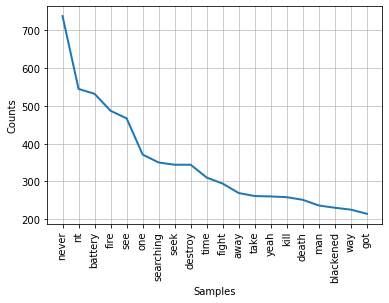

In [19]:
fdist_metallica.plot(20)

In [20]:
fdist_ironmaiden.most_common(20)

[('nt', 614),
 ('na', 415),
 ('die', 412),
 ('running', 402),
 ('gon', 400),
 ('oh', 387),
 ('free', 341),
 ('yeah', 335),
 ('see', 298),
 ('know', 276),
 ('go', 245),
 ('away', 224),
 ('time', 219),
 ('six', 213),
 ('get', 205),
 ('life', 202),
 ('got', 200),
 ('take', 199),
 ('one', 196),
 ('run', 193)]

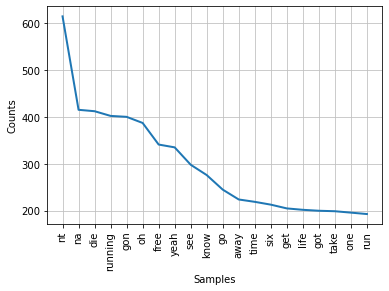

In [21]:
fdist_ironmaiden.plot(20)

In [162]:
# find long words
metallica_set = set(metallica_words)
metallica_longwords = [w for w in metallica_set if len(w) > 11]
print(len(metallica_longwords))
sorted(metallica_longwords)

18


['cancellation',
 'consciousness',
 'constellation',
 'contradiction',
 'crystallized',
 'disappointment',
 'effortlessly',
 'flagellation',
 'hallucination',
 'heartbreaker',
 'hmmhmhmhmhmmm',
 'misunderstanding',
 'motherfucker',
 'motherfucking',
 'nonbelievers',
 'passionateless',
 'surveillance',
 'yeahyeahyeah']

In [163]:
ironmaiden_set = set(ironmaiden_words)
ironmaiden_longwords = [w for w in ironmaiden_set if len(w) > 11]
print(len(ironmaiden_longwords))
sorted(ironmaiden_longwords)

19


['allconsuming',
 'blanckenheimer',
 'breakingpeople',
 'christianity',
 'determination',
 'executioners',
 'insignificance',
 'instrumental',
 'nightwatching',
 'preparations',
 'preservation',
 'reignedmarbled',
 'reincarnates',
 'reinforcements',
 'selfdestruct',
 'spiritualist',
 'startripping',
 'terrorstricken',
 'understanding']

In [166]:
ironmaiden_nltk.concordance('blanckenheimer')

Displaying 1 of 1 matches:
ewter suta , Karma Sutra , even Blanckenheimer 's in your mind Yes ... It 's a


## Lexical richness
the number of distinct words of the total number of words

In [49]:
def lexical_richness(text):
    return round(len(set(text)) / len(text),3)

In [50]:
print("Lexical richness of Metallica:",lexical_richness(metallica_words))
print("Lexical richness of Iron Maiden:",lexical_richness(ironmaiden_words))

Lexical richness of Metallica: 0.049
Lexical richness of Iron Maiden: 0.076


In [87]:
#count how often a word occurs in a text, and compute what percentage of the text is taken up by a specific word

def word_percentage(word, text):
    return round(100 * text.count(word) / len(text),3)

In [90]:
print("'death' % of Metallica songs:", word_percentage('death', metallica_nltk))
print("'death' % of Iron Maiden songs:", word_percentage('death', ironmaiden_nltk))

'death' % of Metallica songs: 0.333
'death' % of Iron Maiden songs: 0.144


In [91]:
print("'blood' % of Metallica songs:", word_percentage('blood', metallica_nltk))
print("'blood' % of Iron Maiden songs:", word_percentage('blood', ironmaiden_nltk))

'blood' % of Metallica songs: 0.102
'blood' % of Iron Maiden songs: 0.154


In [92]:
print("'love' % of Metallica songs:", word_percentage('love', metallica_nltk))
print("'love' % of Iron Maiden songs:", word_percentage('love', ironmaiden_nltk))

'love' % of Metallica songs: 0.06
'love' % of Iron Maiden songs: 0.111


## Visualize the frequency/location of words in text

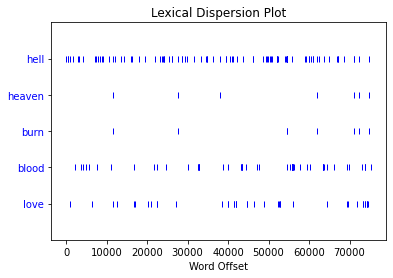

In [34]:
metallica_nltk.dispersion_plot(["hell","heaven","burn","blood","love"])

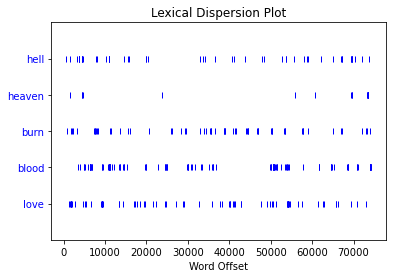

In [32]:
ironmaiden_nltk.dispersion_plot(["hell","heaven","burn","blood","love"])

## Generate text in the style of the input text

In [47]:
metallica_nltk.generate()

Building ngram index...
marshal noise is piercing through your hair A billowing heart beats
Feeling Feeling What a glorious feeling To be dead to have ourselves
some fucking fun here whether you like it or lie it ! , she loves me
still but she 'll be there 'Cause I 'm the one we will never quit
'cause we are Metallica Adrenaline starts to flow You 're thrashing
all around It is hot as hell tonight Adrenaline starts to flow You 're
thrashing all around It is hot as hell tonight Adrenaline starts to
flow You 're thrashing all around It is hot


"marshal noise is piercing through your hair A billowing heart beats\nFeeling Feeling What a glorious feeling To be dead to have ourselves\nsome fucking fun here whether you like it or lie it ! , she loves me\nstill but she 'll be there 'Cause I 'm the one we will never quit\n'cause we are Metallica Adrenaline starts to flow You 're thrashing\nall around It is hot as hell tonight Adrenaline starts to flow You 're\nthrashing all around It is hot as hell tonight Adrenaline starts to\nflow You 're thrashing all around It is hot"

In [48]:
ironmaiden_nltk.generate()

Building ngram index...
my blood is freedom 's stain do n't know '' Fight fire with fire ,
life in death They throw their dice for the touch For the feel of the
scrolls But now through ignorance and fear I cast a shadow through the
bushes with it open wide What you feeling so secure . 've got nowhere
to call my own now Do n't waste your time is short Let him who hath
understanding reckon the number of the darkness Brighter than a
thousands suns Out of the Fire , oh fought for the one unholy ghost In
our nightmare


"my blood is freedom 's stain do n't know '' Fight fire with fire ,\nlife in death They throw their dice for the touch For the feel of the\nscrolls But now through ignorance and fear I cast a shadow through the\nbushes with it open wide What you feeling so secure . 've got nowhere\nto call my own now Do n't waste your time is short Let him who hath\nunderstanding reckon the number of the darkness Brighter than a\nthousands suns Out of the Fire , oh fought for the one unholy ghost In\nour nightmare"

## Sentiment analysis with VADER
VADER return four scores: 
- negative, neutral, positive: They are ratios for proportions of text that fall in each category, and add up to 1.
- compound: "The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive)."

In [68]:
#import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/lorena/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [129]:
sia_metallica = sia.polarity_scores(metallica)
sia_ironmaiden = sia.polarity_scores(ironmaiden)

In [131]:
#vader/sia

sia_scores = pd.DataFrame([sia_metallica, sia_ironmaiden]).T
sia_scores['sia_score'] = sia_scores.index
sia_scores

,0,1,sia_score
neg,0.242,0.182,neg
neu,0.626,0.690,neu
pos,0.132,0.127,pos
compound,-1.000,-1.000,compound


In [133]:
sia_scores.columns=['Metallica','Iron Maiden','sia_score']
cols = ['sia_score','Metallica','Iron Maiden']
sia_scores = sia_scores[cols]
sia_scores = sia_scores.reset_index()
sia_scores = sia_scores[['sia_score','Metallica','Iron Maiden']]
sia_scores.columns=['Feature','Metallica','Iron Maiden']
sia_scores

,sia_score,Metallica,Iron Maiden
0,neg,0.242,0.182
1,neu,0.626,0.690
2,pos,0.132,0.127
3,compound,-1.000,-1.000


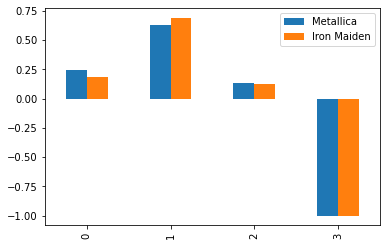

In [158]:
sia_scores.plot(kind='bar')

In [120]:
from textblob import TextBlob

print("Metallica sentiment tb:", TextBlob(metallica).sentiment)
print("Iron Maiden sentiment tb:", TextBlob(ironmaiden).sentiment)

Metallica sentiment tb: Sentiment(polarity=-0.0596757782130864, subjectivity=0.5016269414216868)
Iron Maiden sentiment tb: Sentiment(polarity=0.08171481431862565, subjectivity=0.5105342465315263)


In [95]:
lyrics_analysis = pd.DataFrame({
    'Feature':['lexical richness','long words','polarity','subjectivity'], 
    'Metallica': [lexical_richness(metallica_words), len(metallica_longwords), TextBlob(metallica).polarity, TextBlob(metallica).subjectivity], 
    'Iron Maiden': [lexical_richness(ironmaiden_words), len(ironmaiden_longwords), TextBlob(ironmaiden).polarity, TextBlob(ironmaiden).subjectivity]
    }) 
lyrics_analysis

,Feature,Metallica,Iron Maiden
0,lexical richness,0.049000,0.076000
1,long words,18.000000,19.000000
2,polarity,-0.059676,0.081715
3,subjectivity,0.501627,0.510534


In [155]:
lyrics_analysis = pd.concat([lyrics_analysis, sia_scores], ignore_index=True)
lyrics_analysis

,Feature,Metallica,Iron Maiden
0,lexical richness,0.049000,0.076000
1,long words,18.000000,19.000000
2,polarity,-0.059676,0.081715
3,subjectivity,0.501627,0.510534
4,neg,0.242000,0.182000
5,neu,0.626000,0.690000
6,pos,0.132000,0.127000
7,compound,-1.000000,-1.000000


## Analysis with Spacy

In [168]:
nlp = spacy.load('en_core_web_md')

In [169]:
metallica_spacy = nlp(metallica)
displacy.render(metallica_spacy, style='ent')

In [170]:
ironmaiden_spacy = nlp(ironmaiden)
displacy.render(ironmaiden_spacy, style='ent')

In [173]:
ner_metallica = [(ent.text, ent.label_) for ent in metallica_spacy.ents]
ner_metallica


 ('only one', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('only one', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('Late at night', 'TIME'),
 ('Whiplash', 'PERSON'),
 ('Heads', 'PERSON'),
 ('Whiplash', 'PERSON'),
 ('Metallica', 'PERSON'),
 ("Rock 'n'", 'ORG'),
 ('second', 'ORDINAL'),
 ('second', 'ORDINAL'),
 ('ten', 'CARDINAL'),
 ('Sittin', 'PERSON'),
 ('ten', 'CARDINAL'),
 ('tonight', 'TIME'),
 ('tonight', 'TIME'),
 ('tonight', 'TIME'),
 ('Hoh', 'PERSON'),
 ('tonight', 'TIME'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('only one', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('One thousand', 'CARDINAL'),
 ('Late at night', 'TIME'),
 ('Whiplash', 'PERSON'),
 ('Heads', 'PERSON'),
 ('Whiplash', 'PERSON'),
 ('Metallica'

In [172]:
ner_ironmaiden = [(ent.text, ent.label_) for ent in ironmaiden_spacy.ents]
ner_ironmaiden

sian', 'NORP'),
 ('Russians', 'NORP'),
 ('Russian', 'NORP'),
 ('Russian', 'NORP'),
 ('Russians', 'NORP'),
 ('Russian', 'NORP'),
 ('Sittin', 'PERSON'),
 ('a new day', 'DATE'),
 ('tonight', 'TIME'),
 ('maul\n', 'PERSON'),
 ('White man', 'PERSON'),
 ('Cree\n', 'PRODUCT'),
 ('Indians', 'NORP'),
 ('Horus', 'PRODUCT'),
 ('Osiris', 'ORG'),
 ('Chorus', 'ORG'),
 ('Chorus', 'ORG'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Iron Maiden', 'PERSON'),
 ('Horus', 'PRODUCT'),
 ('Osiris', 'ORG'),
 ('Chorus', 'ORG'),
 ('Chorus', 'ORG'),
 ('bell', 'ORG'),
 ("5 o'clock", 'TIME'),
 ('Mark', 'PERSON'),
 ('Horus', 'PRODUCT'),
 ('Osiris', 'ORG'),
 ('Chorus', 'ORG'),
 ('Chorus', 'ORG'),
 ('bell', 'ORG'),
 ("5 o'clock", 'TIME'),
 ('Mark', 'PERSON'),
 ('night', 'TIME'),
 ('three long years', 'DATE'),
 ('mariner', 'ORG'),
 ('one', 

## Word cloud

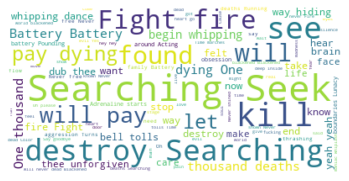

In [181]:
wordcloud = WordCloud(max_words=100, background_color='white').generate(metallica)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

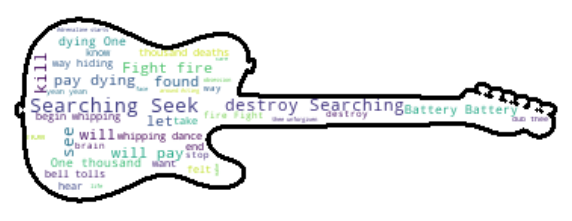

In [185]:
import numpy as np
guitar_mask = np.array(Image.open("guitar2.png"))

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

transformed_guitar_mask = np.ndarray((guitar_mask.shape[0], guitar_mask.shape[1]), np.int32)

for i in range(len(guitar_mask)):
    transformed_guitar_mask[i] = list(map(transform_format, guitar_mask[i]))

# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_guitar_mask, contour_width=3, contour_color='black')

# Generate a wordcloud
wc.generate(metallica)

# store to file
wc.to_file("metalica_wordcould.png")

# show
plt.figure(figsize=[10,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

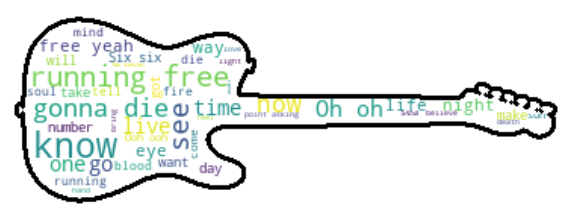

In [186]:
# Generate a wordcloud
wc.generate(ironmaiden)

# store to file
wc.to_file("ironmaiden_wordcould.png")

# show
plt.figure(figsize=[10,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Sentence structure

In [177]:
# Visualize the structure of a sentence from Iron Maiden's 'Isle of Avalon'.
sentence_im = nlp("Through the western isle I hear the dead awaken.")
displacy.render(sentence_im, style='dep')

Spacy interprets this sentence as *I hear through the isle*.
But it can also be read as *the dead awaken through the isle.*

In [178]:
# Visualize the structure of a sentence from Metallica's 'Seek a& Destroy'.
sentence_mt = nlp("We are scanning the scene in the city tonight.")
displacy.render(sentence_mt, style='dep')

## Text similarity

In [174]:
# Check the similarity between the bands' lyrics
metallica_spacy.similarity(ironmaiden_spacy)

0.9974647120728832

# Findings
- Iron Maiden use the word "burn" more than Metallica do.
- Iron Maiden have a richer vocabulary than Metallica: 3.8% unique words vs. 2.6%.
- Iron Maiden have more *blood*, Metallica have more *death*.
- Iron Maiden use more long (complex) words than Metallica.
- Metallica songs are more negative than Iron Maiden.
- Most frequent words in Iron Maiden songs are *not*, *na*, *die*, *running*, *gon'*
- Most frequent words in Metallica songs are *never*, *not*, *battery*, *fire*, *see*
- But in the end, Metallica and Iron Maiden lyrics are very similar (0.99).
- (However, Iron Maiden are slightly superior to Metallica, at least linguistically.)